# <center>        **Introduction to Data Science (S1-22_DSECLZG523)-ASSIGNMENT**</center>

## Group No : 121

## Group Member Names:
1. Soumyadipta Maiti  (2021SC04237)
2. Tauheed Ahmad  (2021SC04698)
3. Dipannita Bandyopadhyay 	(2021SC04700)
4. Tanvir Ahmad  (2021SA04035)

# 1. Business Understanding
 
Students are expected to identify a classification problem of your choice. You have to detail the Business Understanding part of your problem under this heading which basically addresses the following questions.
 
   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

Score: 1 Mark in total (0.25 mark each)

<h4>1. What is the business problem that you are trying to solve? </h4>

If individual person's physical conditions & eating habits are provided, estimation of their obesity levels need to be predicted via Machine Learning.

This dataset contains relevant data for individuals from the countries of Mexico, Peru and Colombia.

<h4>2. What data do you need to answer the above problem? </h4>

Below are input data (independent features) required to answer above problem:

|     Attribute Name     |     Data Type     |        Significance {Permissible Values}       |
| :- | :- | :- |
| Gender | Nominal | {Female,Male} |
| Age | Numeric |  |
| Height | Numeric(Continious) |  |
| Weight | Numeric(Continious) |  |
|  family_history_with_overweight | Nominal | {yes,no} |
| FAVC | Nominal |  Frequent consumption of high caloric food {yes,no} |
| FCVC | Numeric(Continious) | Frequency of consumption of vegetables  |
| NCP | Numeric(Continious) | Number of main meals |
| CAEC | Ordinal | Consumption of food between meals {no,Sometimes,Frequently,Always} |
| SMOKE | Nominal | {yes,no} |
| CH2O | Numeric(Continious) | Consumption of water daily |
| SCC | Nominal | Calories consumption monitoring {yes,no} |
| FAF | Numeric(Continious) | Physical activity frequency |
| TUE | Numeric(Continious) | Time using technology devices |
| CALC | Ordinal | Consumption of alcohol {no,Sometimes,Frequently,Always}  |
| MTRANS | Nominal | Transportation used {Automobile,Motorbike,Bike,Public_Transportation,Walking} |

<h4>3. What are the different sources of data? </h4>

- Data for the estimation of obesity levels in people are collected from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition. 
- 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform with a survey where anonymous users answered each question.
- The data contains 17 attributes and 2111 records.

For More info, refer to below links:<br>

- ["UC Irvine Machine Learning Repository" Main Page](https://archive-beta.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition) 
- ["Attribute Information"](https://doi.org/10.1016/j.dib.2019.104344)

<h4>3.What kind of analytics task are you performing? </h4>

Using Classification Model, we are trying to predict target variable NObesity (Obesity Level) that allows classification of the data among following Obesity Levels:
- Insufficient Weight, 
- Normal Weight, 
- Overweight Level I, 
- Overweight Level II, 
- Obesity Type I, 
- Obesity Type II,
- Obesity Type III.


Independent Attributes related with eating habits (FAVC, FCVC, NCP, CAEC, CH20 & CALC) & attributes related with the physical condition (SCC, FAF, TUE, MTRANS) & other variables (Gender, Age, Height and Weight) can be systematically used to predict target attribute __NObesity__.

# 2. Data Acquisition
 
For the problem identified , find an appropriate data set (Your data set must 
be unique) from any public data source.

---



## 2.1 Download the data directly



__Import of all required Packages__

In [662]:
import urllib.request
import zipfile
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

<h4> Data Download (zipped format) from URL & Reading its content in Byte Format</h4> 

In [663]:
url_ds = "https://archive.ics.uci.edu/ml/machine-learning-databases/00544/ObesityDataSet_raw_and_data_sinthetic (2).zip"
url_ds = url_ds.replace(" ", "%20")
filehandle, _ = urllib.request.urlretrieve(url_ds)
zipfile_obj = zipfile.ZipFile(filehandle, 'r')
second_file = zipfile_obj.namelist()[1]
file = zipfile_obj.open(second_file)
byte_data = file.read()

In [664]:
print(f"Below is Data is Byte Format : \n\n {byte_data}")

Below is Data is Byte Format : 

 b'Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad\r\nFemale,21,1.62,64,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight\r\nFemale,21,1.52,56,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight\r\nMale,23,1.8,77,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight\r\nMale,27,1.8,87,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I\r\nMale,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II\r\nMale,29,1.62,53,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight\r\nFemale,23,1.5,55,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Motorbike,Normal_Weight\r\nMale,22,1.64,53,no,no,2,3,Sometimes,no,2,no,3,0,Sometimes,Public_Transportation,Normal_Weight\r\nMale,24,1.78,64,yes,yes,3,3,Sometimes,no,2,no,1,1,Frequently,Public_Transportation

## 2.2 Code for converting the above downloaded data into a dataframe

<h4>Conversion of Bytecode Data into DataFrame</h4>

In [665]:
str_utf8=str(byte_data,'utf-8')
data_str = StringIO(str_utf8) 
df_obs = pd.read_csv(data_str)

#Back-up of Original DataFrame
df_obs_org = df_obs.copy(deep=True)

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [666]:
print(f"Display of First 5 records of DataSet \n")

df_obs.head(5)

Display of First 5 records of DataSet 



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [667]:
print(f"Display of Last 5 records of DataSet : \n")

df_obs.tail(5)

Display of Last 5 records of DataSet : 



,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

<h5>Column Headings of DateSet</h5> 

In [668]:
print(f"Headings of Columns of DataSet : \n\n {df_obs.columns.values}")

Headings of Columns of DataSet : 

 ['Gender' 'Age' 'Height' 'Weight' 'family_history_with_overweight' 'FAVC'
 'FCVC' 'NCP' 'CAEC' 'SMOKE' 'CH2O' 'SCC' 'FAF' 'TUE' 'CALC' 'MTRANS'
 'NObeyesdad']


<h4>Descriptive Statistics of DataSet</h4>

In [669]:
df_obs.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## 2.5 Write your observations from the above. 
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

Score: 2 Marks in total (0.25 marks for 2.1, 0.25 marks for 2.2, 0.5 marks for 2.3, 0.25 marks for 2.4, 0.75 marks for 2.5)

1. Size of the dataset

In [670]:
print(f"Overall Size of DataSet is : {df_obs.shape}")

Overall Size of DataSet is : (2111, 17)


2. What type of data attributes are there?

In [671]:
print(f"Details of Columns of DataSet : \n")
df_obs.info()

Details of Columns of DataSet : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  

3. Is there any null data that has to be cleaned?

In [672]:
print(f"Columns along with their null value count : \n")
df_obs.isnull().sum()

Columns along with their null value count : 



Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

So, there is no null values in this dataset.

# 3. Data Preparation

<h4>Numerical Columns of Dataset </h4>

In [673]:
#selection of numeric columns
df_obs_num = df_obs.select_dtypes(exclude=['object'])
print(f'Below are Numerical Columns of Dataset:\n {df_obs_num.columns}')

Below are Numerical Columns of Dataset:
 Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


<h4>Categorical Columns of Dataset </h4>

In [674]:
# Analysis of categorical Values
df_obs_cat = df_obs.select_dtypes(include='object')

print('Analysis of categorical Values for Dataset:\n')

for col in df_obs_cat:
    print(f'Field {col} has unique values: {df_obs_cat[col].unique()}')

Analysis of categorical Values for Dataset:

Field Gender has unique values: ['Female' 'Male']
Field family_history_with_overweight has unique values: ['yes' 'no']
Field FAVC has unique values: ['no' 'yes']
Field CAEC has unique values: ['Sometimes' 'Frequently' 'Always' 'no']
Field SMOKE has unique values: ['no' 'yes']
Field SCC has unique values: ['no' 'yes']
Field CALC has unique values: ['no' 'Sometimes' 'Frequently' 'Always']
Field MTRANS has unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Field NObeyesdad has unique values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


As all Columns of "object" type are categorical in nature, ther is no column of Text Type.

Hence, we will bypass all tasks specific to Text Columns. 

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


Duplicate Data

In [675]:
# df_obs.duplicated().value_counts()
print(f"Number of duplicate rows in DataSet : {df_obs.duplicated().sum()}")

Number of duplicate rows in DataSet : 24


Missing Data

In [676]:
# df_obs.isna().value_counts()
df_obs.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

So, there is no Missing Value in this DataSet

Data Inconsistencies

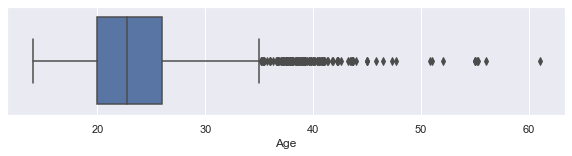

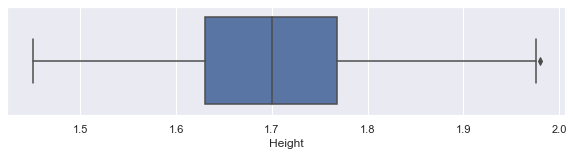

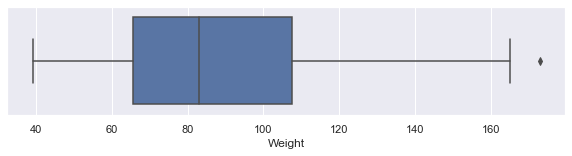

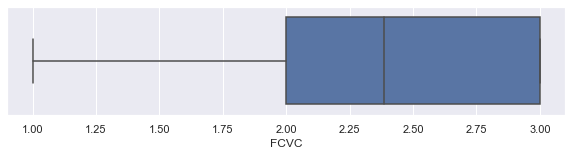

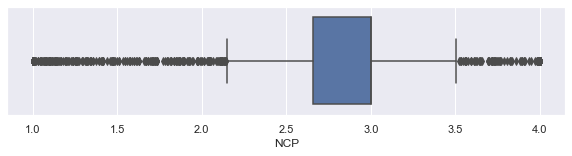

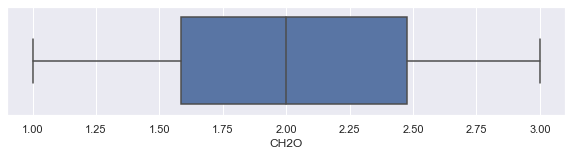

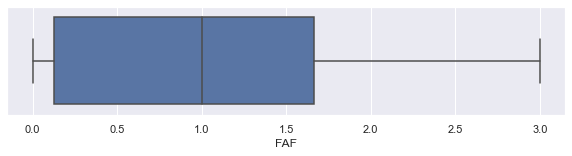

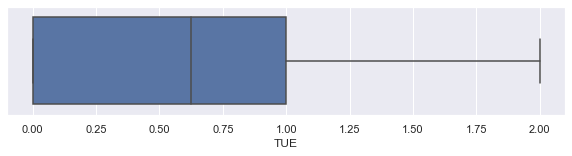

In [677]:
#selection of numeric columns

WIDTH_SIZE = 30
HEIGHT_SIZE = 10

for col in df_obs_num:
    plt.figure(figsize=(10,2))
#     plt.figure(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
#     sns.set(rc={'figure.figsize':(WIDTH_SIZE,HEIGHT_SIZE)})
    sns.boxplot(x=col, data=df_obs_num)

From above pyplot, below can be inferred that Age, NCP have outliers.

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


<h4> Removal of Duplicate Rows from DataSet</h4>

In [678]:
if df_obs.duplicated().sum()>0:
    df_obs.drop_duplicates(inplace=True)
    print(f"Number of Deleted Duplicate Rows from DataSet  : {df_obs_org.shape[0]-df_obs.shape[0]}")  
else:
    print(f"No Duplicate row present in DataSet.")
    

Number of Deleted Duplicate Rows from DataSet  : 24


<h4>Imputation or Removal of missing data</h4>

2 primary ways of handling missing values:

- Deleting the Missing values:
  - If the missing value is of type Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted
  - Deleting the entire row __df.dropna(axis=0)__
  - Deleting the entire column __df.drop(column1)],axis=1)__
- Imputing the Missing Values
  - Replacing with an arbitrary value __train_df[column1]= train_df[column1].fillna(0)__
  - Replacing with the mean __train_df[column1].fillna(train_df[column1].mean())__
  - Replacing with the mode __train_df[column1].fillna(train_df[column1].mode())__
  - Replacing with the median
  - Replacing with the previous value – forward fill
  - Replacing with the next value – backward fill
  - Interpolation

In [679]:
# import numpy as np
# df_obs.fillna(method='bfill')
# df_obs.replace(to_replace=np.nan, value=0.0)
# df_obs.interpolate(method='linear')
# # df_obs.dropna(how='all')

As there is no missing data, this step is not applicable for our DataSet

<h4>Removal of Data Inconsistencies</h4>

In [680]:
### Detecting the outliers using IQR and removing them

def outlier_process(df, col, q1_percnt, q3_percnt):
    
    import numpy as np
    q1 = np.percentile(df[col], q1_percnt, interpolation='midpoint')
    q3 = np.percentile(df[col], q3_percnt, interpolation='midpoint')

    iqr = q3 - q1

#     upper = q3 + 1.5 * iqr
#     lower = q1 - 1.5 * iqr
    upper = q3 + 3 * iqr
    lower = q1 - 3 * iqr
            

    return col, upper, lower

In [681]:
for col_num in df_obs_num:
    col_num, upper_num, lower_num = outlier_process(df_obs_num, col_num, 25, 75)
    df_obs.drop(df_obs[(df_obs[col_num] < lower_num) | (df_obs[col_num] > upper_num)].index, inplace=True)
    df_obs.reset_index(drop=True, inplace=True)


print("Shape of Original DataSet : ", df_obs_org.shape)
print("Shape of Modified DataSet after Removal of Inconsistent Data & Outliers: ", df_obs.shape)


Shape of Original DataSet :  (2111, 17)
Shape of Modified DataSet after Removal of Inconsistent Data & Outliers:  (1758, 17)


## 3.3 Encode categorical data

<h4>Binning of few Attributes having continious values</h4>

- Frequency of consumption of vegetables (FCVC) :--> {Never, Sometimes, Always}
- Number of main meals (NCP) :-->    {Between 1 & 2, Three, More than three}
- Consumption of water daily (CH20) :--> {Less than a liter, Between 1 and 2 L, More than 2 L} 
- Physical activity frequency (FAF) :--> {I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days} 
- Time using technology devices (TUE) :--> { 0–2 hours, 3–5 hours, More than 5 hours}

In [682]:
df_obs['FCVC'] = pd.to_numeric(pd.cut(df_obs['FCVC'],bins=[0,.5,1.5,3], labels=[0,1,2], include_lowest=True))
# df_obs['FCVC'] = pd.to_numeric(pd.cut(df_obs['FCVC'],bins=3, labels=[1,2,3]))

In [683]:
df_obs['NCP'] = pd.to_numeric(pd.cut(df_obs['NCP'],bins=[0,.5,1.5,2.5,3.5,4], labels=[0,1,2,3,4], include_lowest=True))

In [684]:
df_obs['CH2O'] = pd.to_numeric(pd.cut(df_obs['CH2O'],bins=[0,.5,1.5,2.5,3.5,4], labels=[0,1,2,3,4], include_lowest=True))

In [685]:
df_obs['FAF'] = pd.to_numeric(pd.cut(df_obs['FAF'],bins=[0,.5,1.5,2.5,3.5,4.5], labels=[0,1,2,3,4], include_lowest=True))

In [686]:
df_obs['TUE'] = pd.to_numeric(pd.cut(df_obs['TUE'],bins=[0,0.5,1.5,2.5], labels=[0,1,2], include_lowest=True))

In [687]:
# Analysis of categorical Values
df_obs_cat = df_obs.select_dtypes(include='object')

print('Analysis of categorical Values for Dataset:\n')

for col in df_obs_cat:
    print(f'Field {col} has unique values: {df_obs[col].unique()}')

Analysis of categorical Values for Dataset:

Field Gender has unique values: ['Female' 'Male']
Field family_history_with_overweight has unique values: ['yes' 'no']
Field FAVC has unique values: ['no' 'yes']
Field CAEC has unique values: ['Sometimes' 'Frequently' 'Always' 'no']
Field SMOKE has unique values: ['no' 'yes']
Field SCC has unique values: ['no' 'yes']
Field CALC has unique values: ['no' 'Sometimes' 'Frequently']
Field MTRANS has unique values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
Field NObeyesdad has unique values: ['Normal_Weight' 'Overweight_Level_I' 'Obesity_Type_I'
 'Overweight_Level_II' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


<h4> Hence, "NObeyesdad", "CAEC", "CALC" can be treated as Ordinal and "Gender", "family_history_with_overweight", "FAVC", "FCVC", "SMOKE", "SCC", "MTRANS" can be treated as Nominal categorical Fields.</h4>

In [688]:
ord_col = ["CAEC", "CALC"] #excluding target variable "NObeyesdad" as it's performed in a later stage

nom_col = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS"]

##### Label Encoding for ordinal variables

In [689]:
le = preprocessing.LabelEncoder()
df_obs[ord_col] = df_obs[ord_col].apply(le.fit_transform)

#### One-Hot Encoding for Nomimal Variables

In [690]:
df_obs = pd.get_dummies(df_obs,columns=nom_col)

# ohe = preprocessing.OneHotEncoder()
# df_obs[nom_col] = df_obs[nom_col].apply(ohe.fit_transform)


## 3.4 Text data

1. Remove special characters
2. Change the case (up-casing and down-casing).
3. Tokenization — process of discretizing words within a document.
4. Filter Stop Words.

As There is no Text Data, all above tasks are not applicable for this DataSet.

## 3.4 Report

Mention and justify the method adopted 
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 

OR for textdata
* How many tokens after step 3?
* how may tokens after stop words filtering?

If the any of the above are not present, then also add in the report below.

Score: 2 Marks (based on the dataset you have, the data prepreation you had to do and report typed, marks will be distributed between 3.1, 3.2, 3.3 and 3.4)

<h4>Justification of Method adopted to remove Duplicate Data</h4>

it's typically a good idea to remove duplicate data points so the model can better generalize to the full dataset.
Duplicates are an extreme case of nonrandom sampling, and they bias your fitted model. Including them will essentially lead to the model overfitting this subset of points. 

__pandas.DataFrame.drop_duplicates()__ method is used to Return DataFrame with duplicate rows removed.

<h4>Justification of Method adopted to impute/remove Missing Data</h4>

As there is no Missing Data available, no action is taken wrt Imputation/Removal of Missing Data

<h4>Justification of Method adopted to remove Data Inconsistencies</h4>

Data Inconsistencies lead to inaccurate, inconsistent, and error-prone data impacting negatively to performance of ML model.<br>
It is be of following main types:
-  Fixing Structural errors: The errors that arise during measurement, transfer of data, or other similar situations are called structural errors. 
- Managing Unwanted outliers: Outliers can cause problems with certain types of models. 
- Removal of unwanted observations: This includes deleting duplicate/ redundant or irrelevant values from your dataset. 


Data cleaning is a crucial step in the machine learning (ML) pipeline, as it involves identifying and removing any missing, duplicate, or irrelevant data. 

Inconsistent Data is removed by __Outlier Detection__ via InterQuartile Range (IQR) for Numerical Features using following formula:<br>
Upper Bound = Q3 + 3 * IQR <br>
Lower Bound = Q1 - 3 * IQR

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

Score: 1 Mark

<h4>Splitting Dataset based on X (independent) & y (dependent) features</h4>

Target Variable is "NObeyesdad" <br>
Splitting whole dataset into Independent(X) & Dependent(y) variables.

In [691]:
X_clf = df_obs.iloc[:,df_obs.columns!='NObeyesdad']
y_clf = df_obs.iloc[:,df_obs.columns =='NObeyesdad']

As Target Variable "NObeyesdad" is Ordinary categorical Type, Label Encoding is used.<br>

In [692]:
trg_col = ["NObeyesdad"]
y_clf[trg_col] = y_clf[trg_col].apply(le.fit_transform)
df_obs[trg_col] = df_obs[trg_col].apply(le.fit_transform)

y_clf['NObeyesdad'].value_counts()

4    324
3    271
2    268
1    230
0    230
6    225
5    210
Name: NObeyesdad, dtype: int64

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

Score: 1 Mark

<h4>Scatter plot of each quantitative(Numerical) attribute with Target</h4>

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

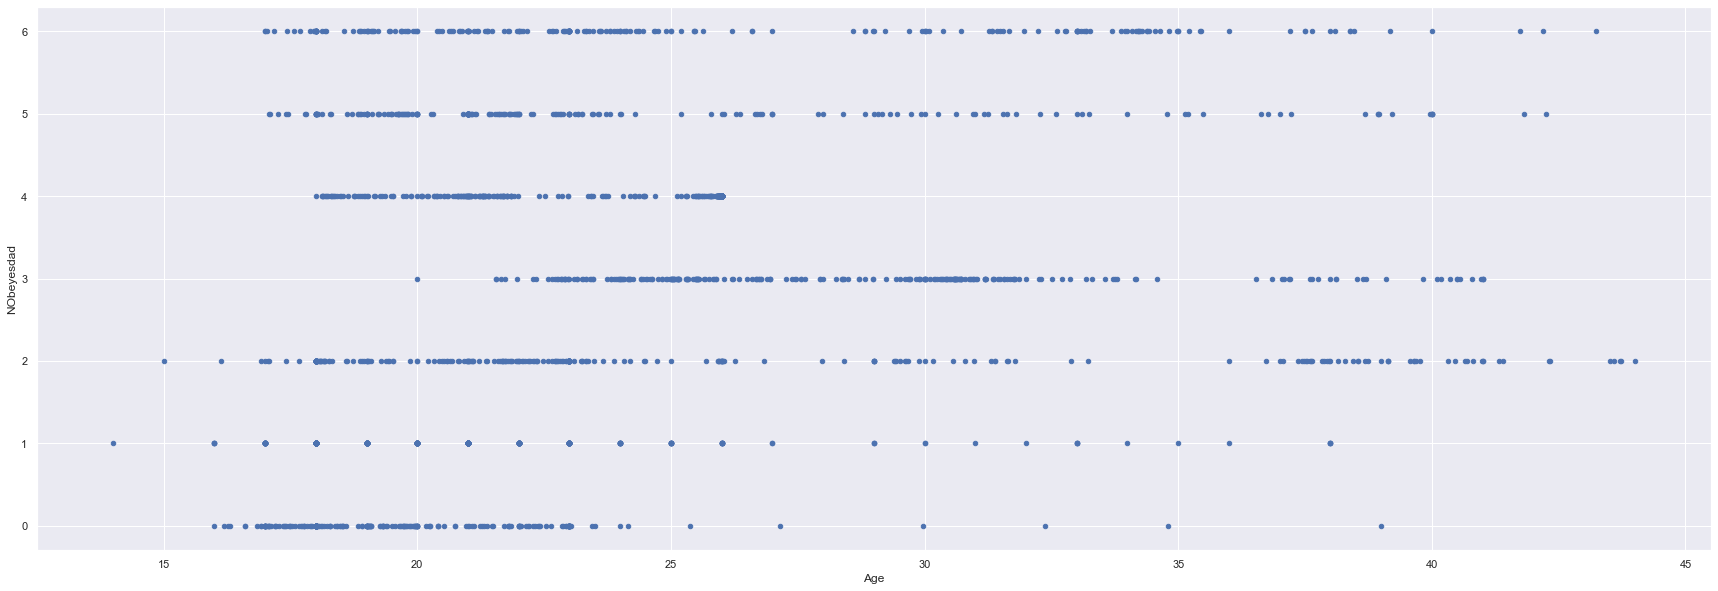

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

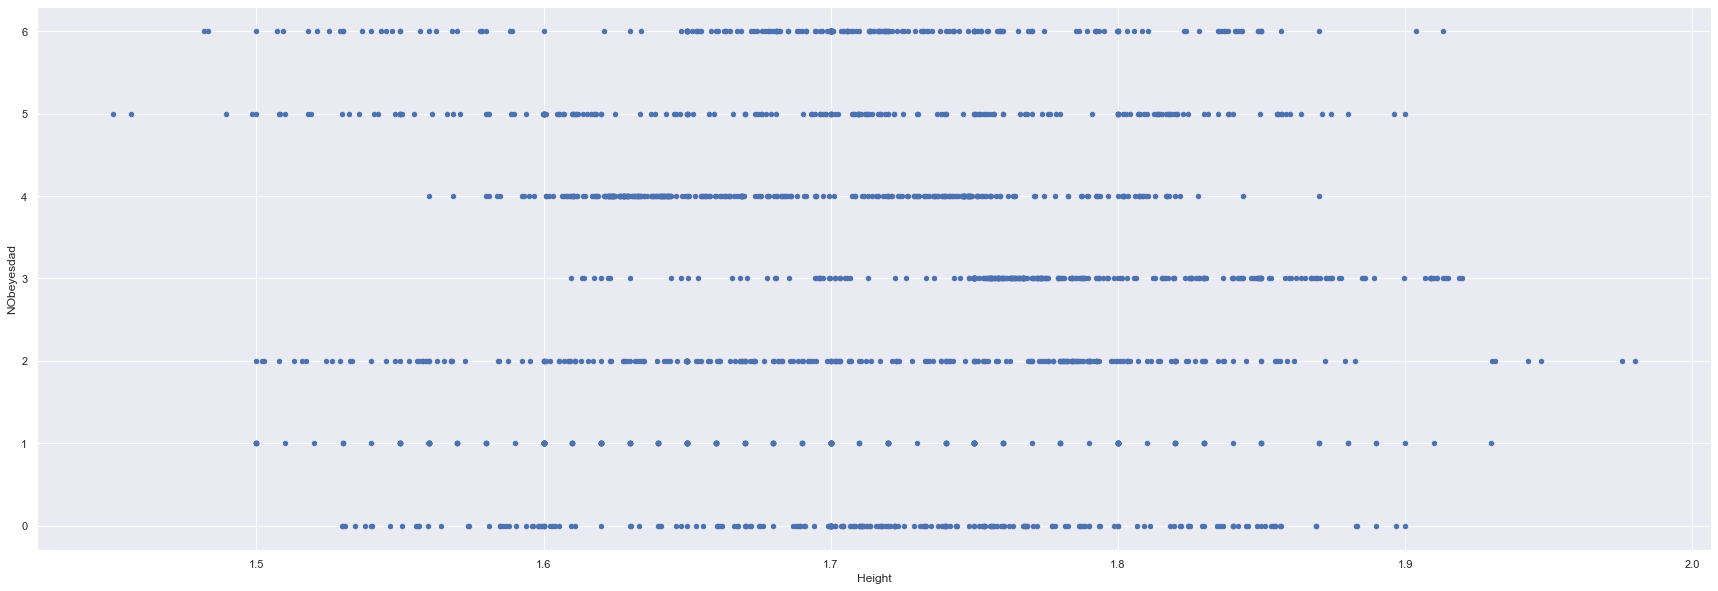

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

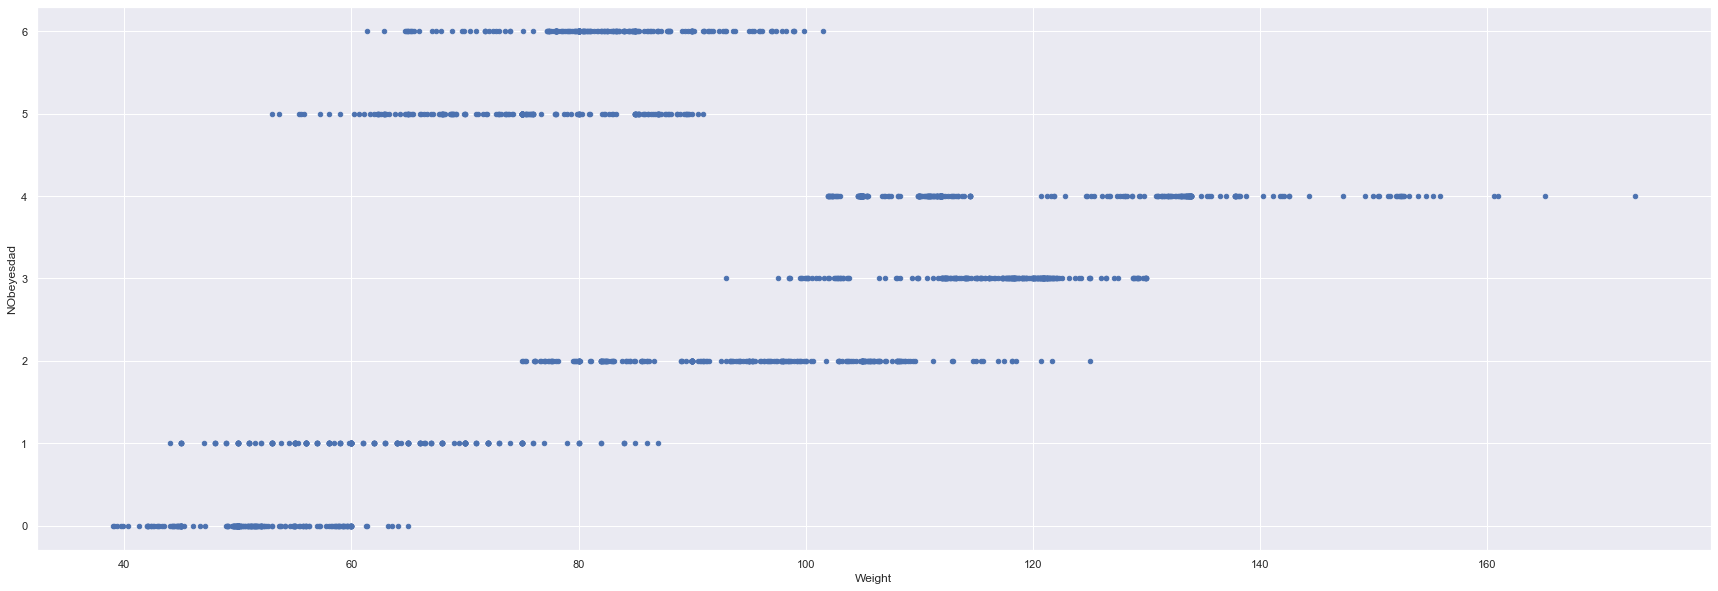

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

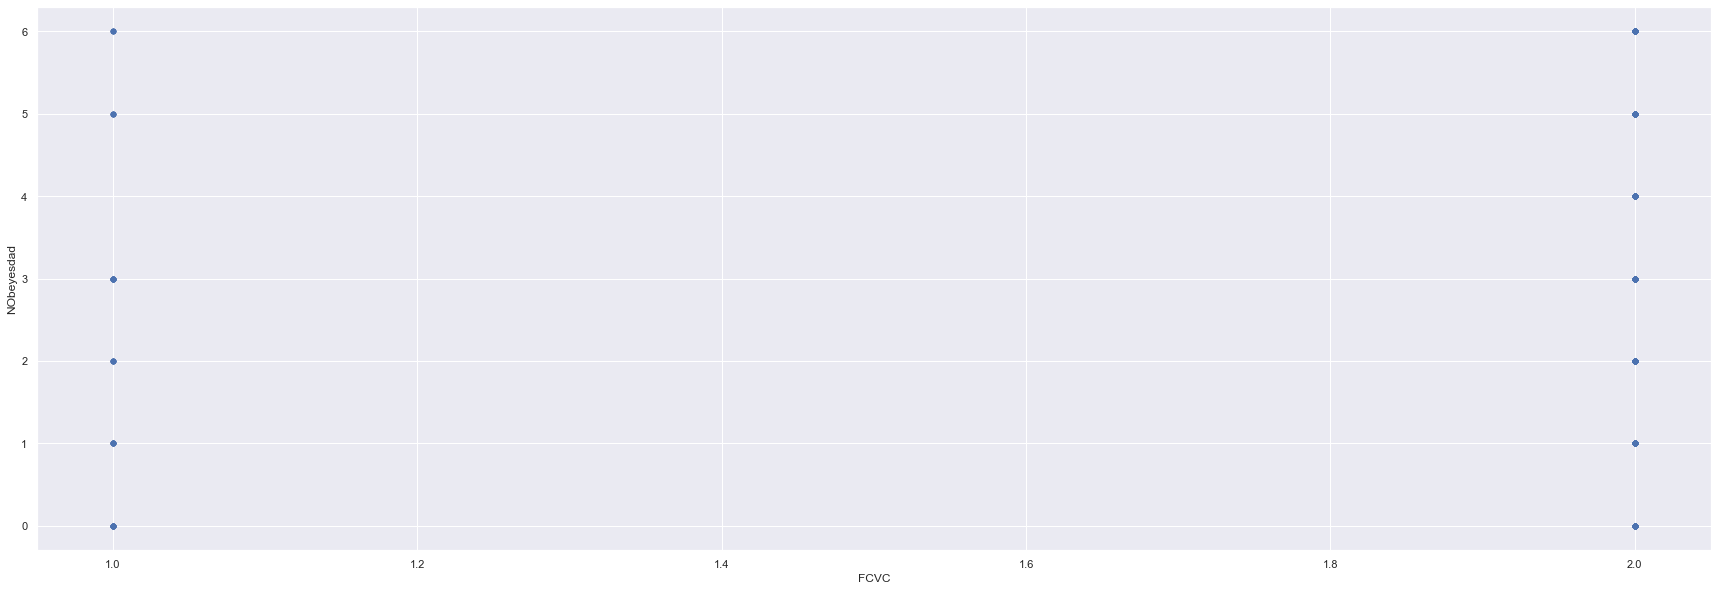

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

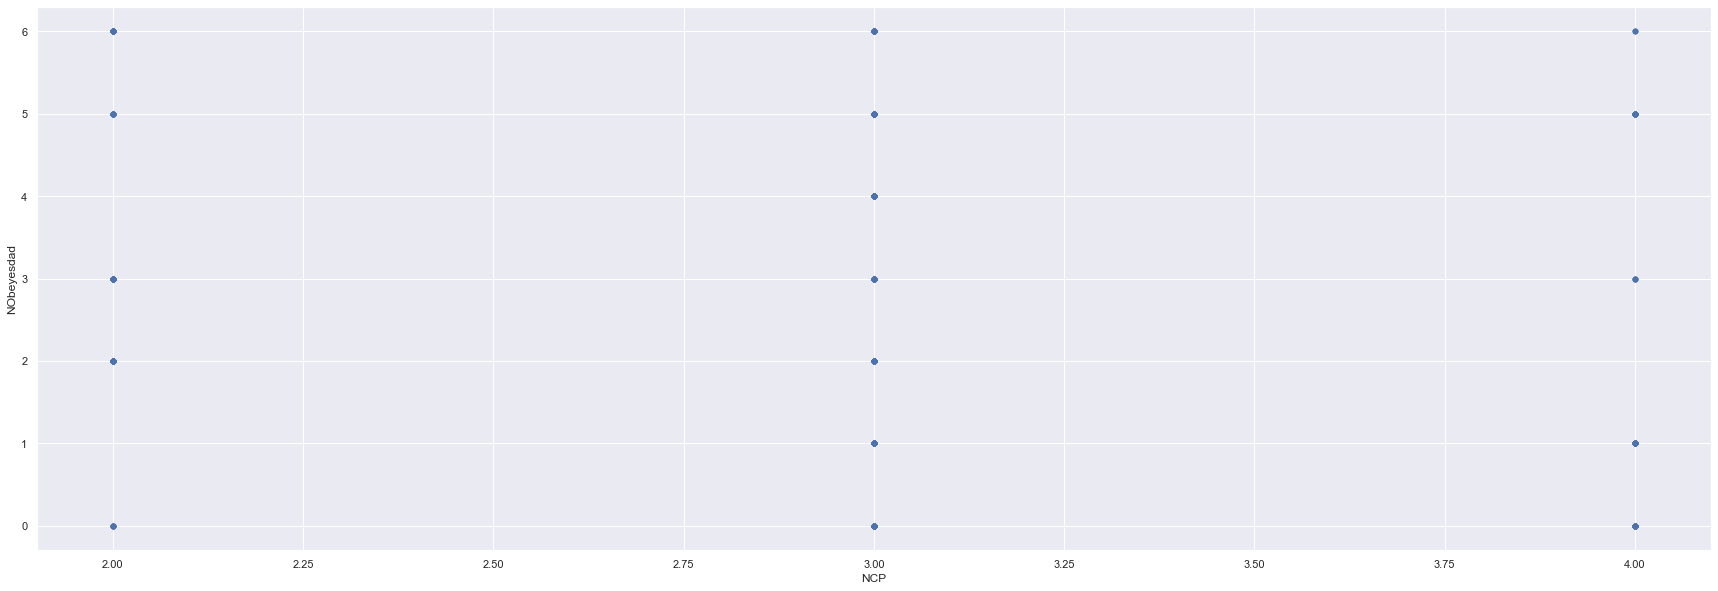

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

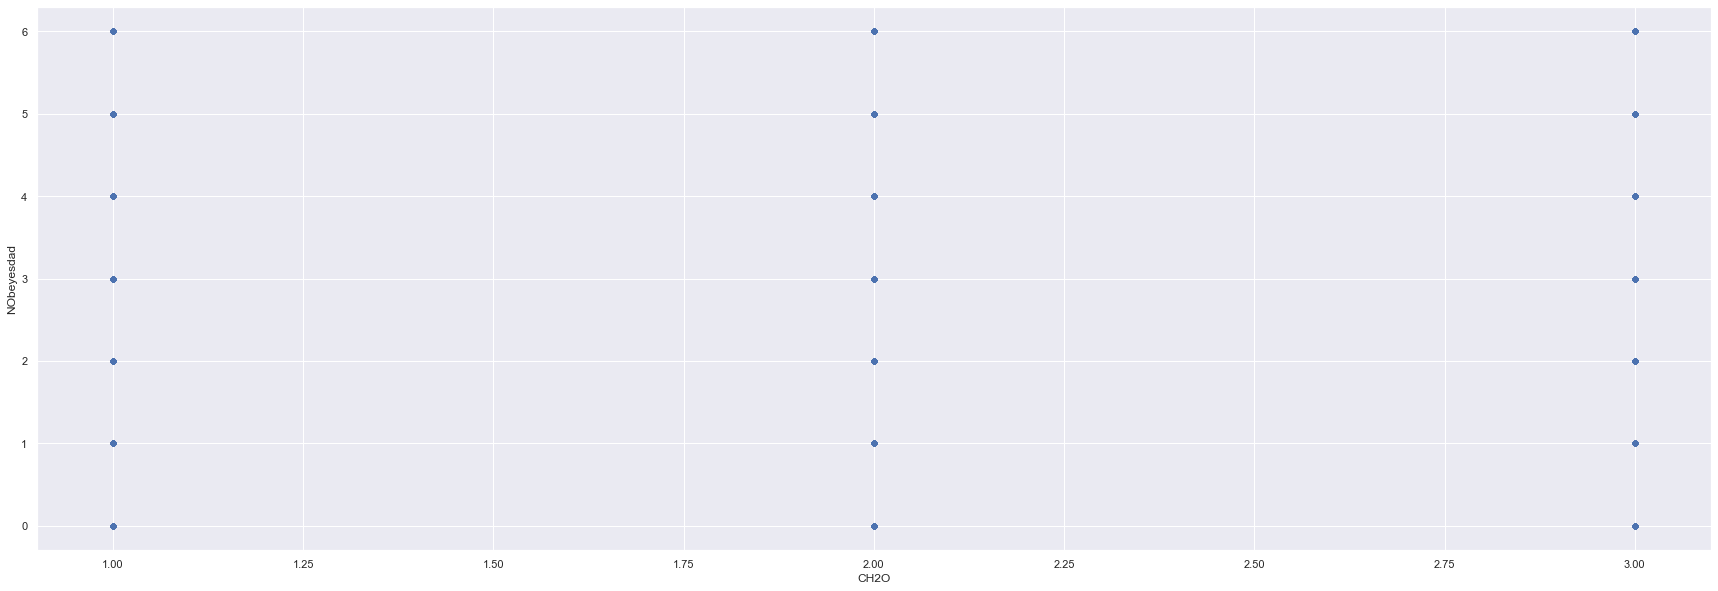

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

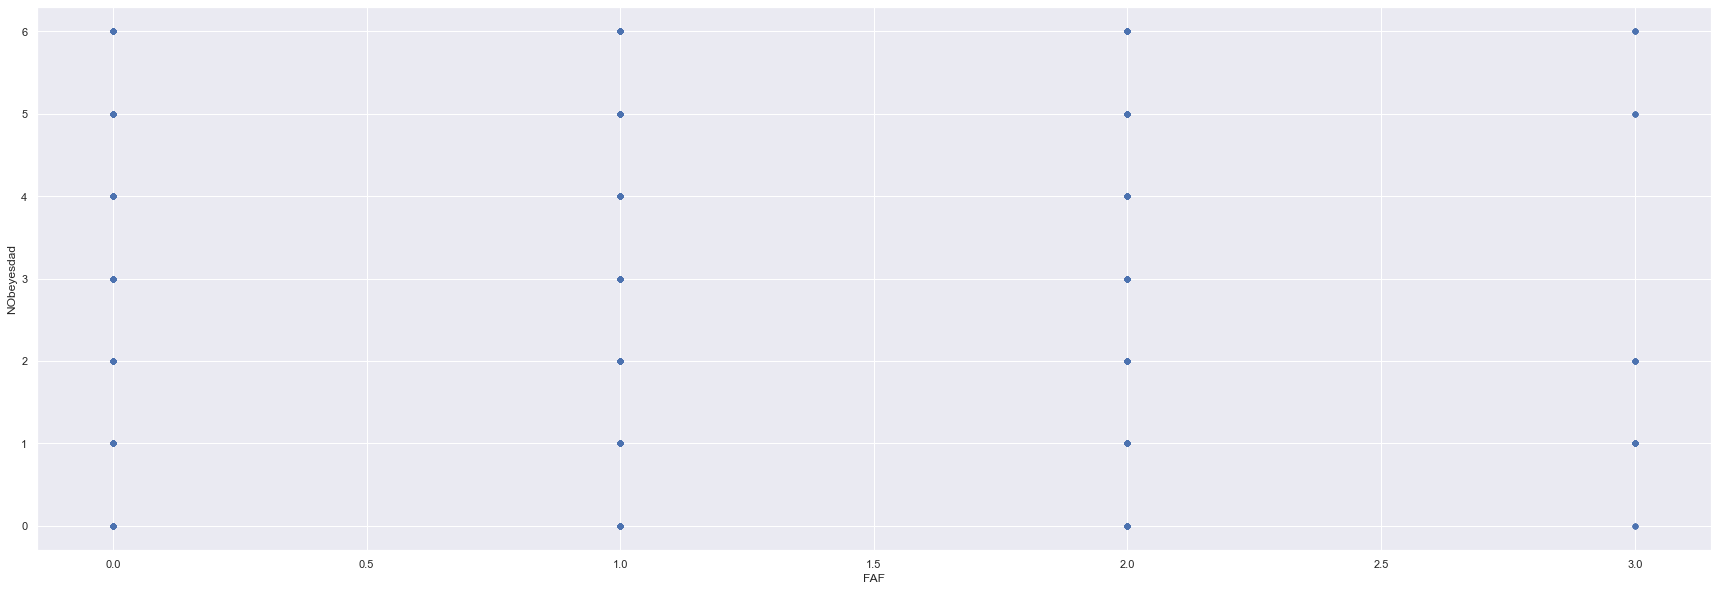

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<Figure size 720x360 with 0 Axes>

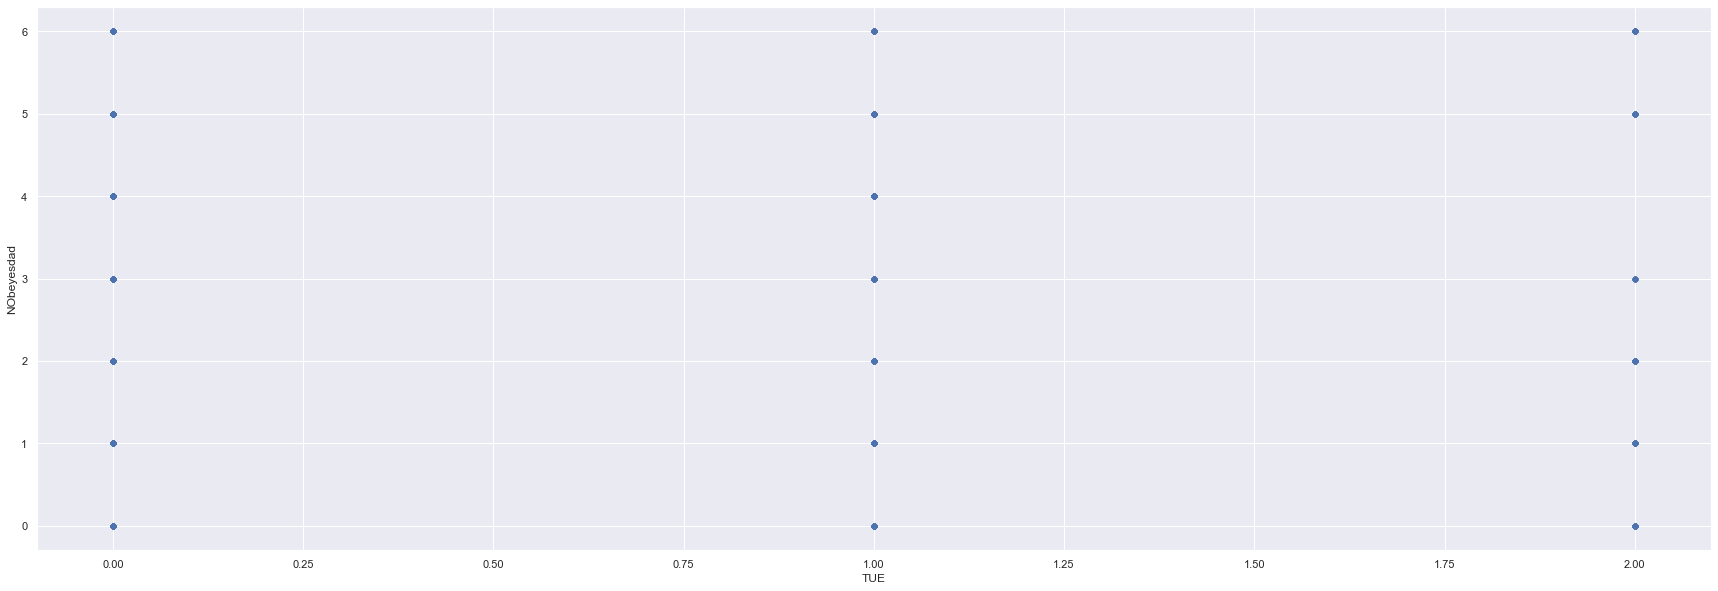

In [693]:
# for col in df_obs:
for col in df_obs_num:
    plt.figure(figsize=(10,5))
    df_obs.plot.scatter(x=col,y='NObeyesdad')
    plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification. 
* Name them, explain why you think they can be helpful in the task and perform the plot as well. Unless proper justification for the choice of plots given, no credit will be awarded.

Score: 2 Marks

In [694]:
# df_obs.columns
df_obs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 26 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 1758 non-null   float64
 1   Height                              1758 non-null   float64
 2   Weight                              1758 non-null   float64
 3   FCVC                                1758 non-null   int64  
 4   NCP                                 1758 non-null   int64  
 5   CAEC                                1758 non-null   int32  
 6   CH2O                                1758 non-null   int64  
 7   FAF                                 1758 non-null   int64  
 8   TUE                                 1758 non-null   int64  
 9   CALC                                1758 non-null   int32  
 10  NObeyesdad                          1758 non-null   int32  
 11  Gender_Female                       1758 no

<h4>Checking correlation using heatmap</h4>

Compute pairwise correlation of columns, excluding NA/null values using the ‘Pearson’ method. 

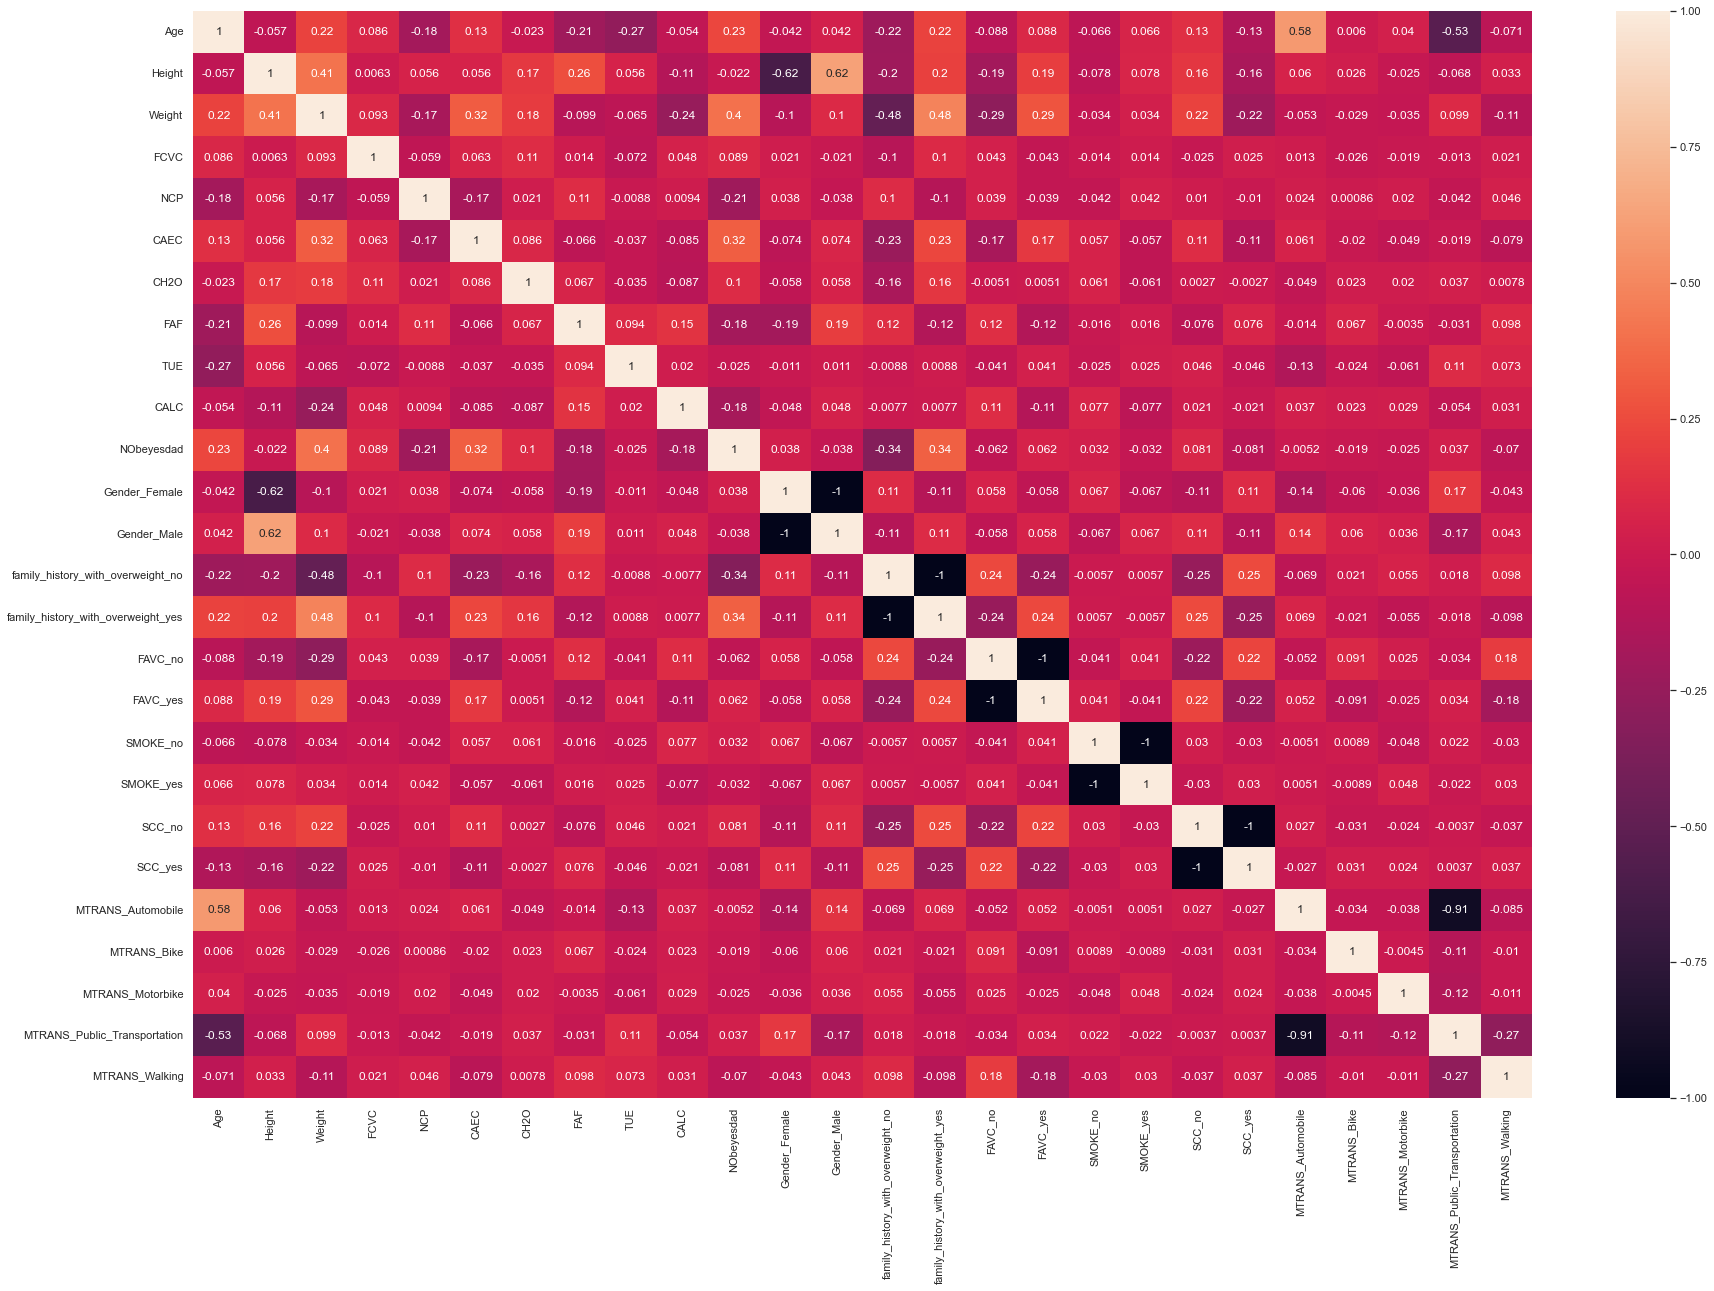

In [695]:
# fig, ax = plt.subplots(figsize=(WIDTH_SIZE,HEIGHT_SIZE))
fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(df_obs.corr(method='pearson'), annot=True)
plt.show()

<h4>As per above Correlation Matrix, below are findings:</h4>
    
- NObeyesdad is correlated with Weight, CAEC, family_history_with_overweight.
- NObeyesdad is not at all correlated with MTRANS_Automobile, CALC, Height.(Drop them)

- MTRANS_Public_Transportation is highly correlated with MTRANS_Automobile. (Drop MTRANS_Automobile)
- SCC_yes is highly correlated with SCC_no(drop anyone)
- SMOKE_yes is highly correlated with SMOKE_no(drop one)
- FAVC_yes is highly correlated with FAVC_no(drop one)
- family_history_with_overweight_yes is highly correlated with family_history_with_overweight_no (drop one)
- Gender_Male is highly correlated with Gender_Female (drop one)

<h4>Pairplot to check Relation of related Features wrt Dependent Feature</h4>

Plot of Independent Variables wrt Dependent Variable : 



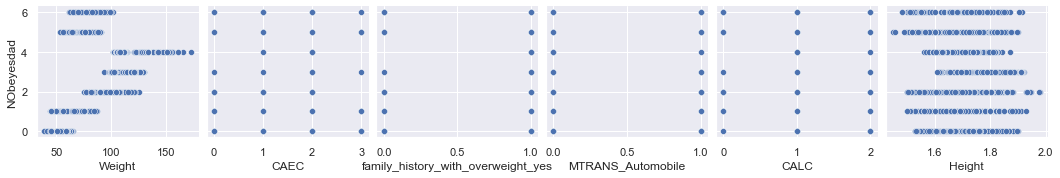

In [696]:
print("Plot of Independent Variables wrt Dependent Variable : \n")

sns.set(rc={'figure.figsize':(WIDTH_SIZE,HEIGHT_SIZE)})
sns.pairplot(df_obs,
x_vars=['Weight', 'CAEC', 'family_history_with_overweight_yes', 'MTRANS_Automobile', 'CALC', 'Height'],
y_vars=['NObeyesdad'])

plt.show()

# 5. Data Wrangling



## 5.1 Univariate Filters 

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring 
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score
(From the above 5 you are required to use only any <b>two</b>) 

#### For Text data

1. Stemming / Lemmatization.
2. Forming n-grams and storing them in the document vector.
3. TF-IDF
(From the above 2 you are required to use only any <b>two</b>)


Score: 3 Marks

<h4>Splitting Dataset into Train & Test dataset</h4>

Original Dataset is split into Train & Test dataset in 70:30 ratio.

In [697]:
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf,y_clf, test_size=.3, random_state=25)

<h4>Mutual Information (Information Gain)</h4>

- It measures the reduction in uncertainty in variable Y when variable X is known.
- To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.
- Smaller the value of the mi, the less information we can infer from the feature about the target

In [698]:
# calculate mutual information between variables & target

mi_clf = mutual_info_classif(X_train_clf,y_train_clf)
mi_clf

array([0.55932758, 0.40242206, 1.27277144, 0.00632232, 0.12433545,
       0.13327068, 0.04017204, 0.05492879, 0.09590217, 0.09812287,
       0.2310324 , 0.23452377, 0.14703362, 0.15090927, 0.07563934,
       0.09397025, 0.02783572, 0.01067299, 0.03391837, 0.04375712,
       0.03962432, 0.02266058, 0.00314913, 0.08350753, 0.        ])

Text(0, 0.5, 'Mutual Information')

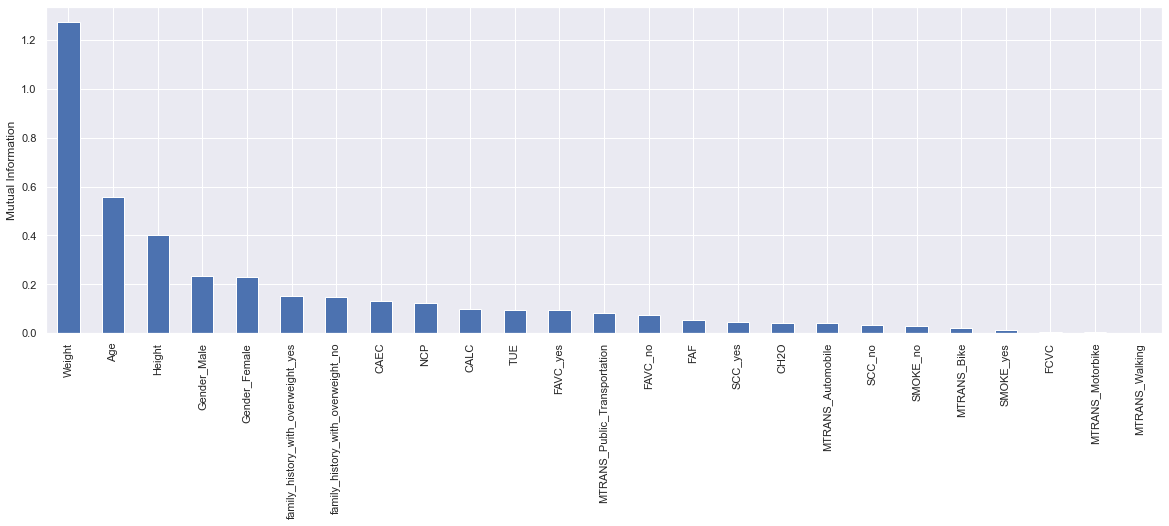

In [699]:
# sort features based on their mutual information value & make var plot
mi_clf = pd.Series(mi_clf)
mi_clf.index = X_train_clf.columns
mi_clf.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

There are a few features (left of the plot) with higher mutual information values. There are also features with almost zero MI values on the right of the plot.

There are a few ways in which feature will be selected:

- Select top k features, where k is an arbitrary number of features
- Select features in the top n percentile, where n is again an arbitrary number
- Select all features above a certain threshold of MI, arbitrarily decided.

In [700]:
# will select top 10 features based on their mutual information value

# select features
sel_fea_mi = SelectKBest(mutual_info_classif, k=10).fit(X_train_clf, y_train_clf)

# display features
X_train_clf.columns[sel_fea_mi.get_support()]

Index(['Age', 'Height', 'Weight', 'CAEC', 'FAF', 'CALC', 'Gender_Female',
       'Gender_Male', 'family_history_with_overweight_no',
       'family_history_with_overweight_yes'],
      dtype='object')

In [701]:
# to remove the rest of the features:

X_train_mi = sel_fea_mi.transform(X_train_clf)
X_test_mi = sel_fea_mi.transform(X_test_clf)

<h4>Chi-Squared test</h4>

- Compute chi-squared stats between each non-negative feature and class.
- This score should be used to evaluate categorical variables in a classification task.


In [702]:
# calculate chi2 p_value between each of variables & target
# chi2 returns 2 arrays, one contains F-Scores which are then evaluated against chi2 distribution to obtain pvalue.
# p-values are in the second array

f_score_clf = chi2(X_train_clf.fillna(0), y_train_clf)

# the 2 arrays of values
f_score_clf

(array([3.79525000e+02, 6.36913493e-01, 8.69910650e+03, 8.58426316e-01,
        9.07166867e+00, 2.33865723e+01, 1.46870232e+01, 7.33888269e+01,
        3.95429036e+01, 2.70387638e+01, 2.41304890e+02, 2.15318210e+02,
        3.08610774e+02, 5.99244222e+01, 1.38412389e+02, 1.84975082e+01,
        6.96723544e-01, 3.10429046e+01, 3.24340499e+00, 6.92909247e+01,
        7.98677715e+01, 1.73151215e+01, 1.06947494e+01, 2.81871821e+01,
        4.34679286e+01]),
 array([7.03333384e-79, 9.95752704e-01, 0.00000000e+00, 9.90414824e-01,
        1.69587415e-01, 6.76823828e-04, 2.28357561e-02, 8.23470895e-14,
        5.60114362e-07, 1.42406082e-04, 2.95494828e-49, 1.03605749e-43,
        1.16783868e-63, 4.66298239e-11, 2.16740801e-27, 5.10204651e-03,
        9.94561503e-01, 2.48755977e-05, 7.77735068e-01, 5.71461596e-13,
        3.80477376e-15, 8.19229616e-03, 9.82812767e-02, 8.66340278e-05,
        9.42364827e-08]))

In [703]:
# capture the p_values & add variable names in index & order variables based on their fscore

pvalues = pd.Series(f_score_clf[1])
pvalues.index = X_train_clf.columns
pvalues.sort_values(ascending=True)

Weight                                0.000000e+00
Age                                   7.033334e-79
family_history_with_overweight_no     1.167839e-63
Gender_Female                         2.954948e-49
Gender_Male                           1.036057e-43
FAVC_no                               2.167408e-27
MTRANS_Automobile                     3.804774e-15
FAF                                   8.234709e-14
SCC_yes                               5.714616e-13
family_history_with_overweight_yes    4.662982e-11
MTRANS_Walking                        9.423648e-08
TUE                                   5.601144e-07
SMOKE_yes                             2.487560e-05
MTRANS_Public_Transportation          8.663403e-05
CALC                                  1.424061e-04
CAEC                                  6.768238e-04
FAVC_yes                              5.102047e-03
MTRANS_Bike                           8.192296e-03
CH2O                                  2.283576e-02
MTRANS_Motorbike               

Smaller the p_value, more significant the feature is to predict target. <br>
Thus, from the result above, Weight is most important feature, as it has the smallest p-value.

In [704]:
# sel_fea_chi = SelectKBest(chi2, k=10).fit(X_train_clf, y_train_clf)
sel_fea_chi = SelectPercentile(chi2, percentile=50).fit(X_train_clf, y_train_clf)

# display features
X_train_clf.columns[sel_fea_chi.get_support()]

Index(['Age', 'Weight', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male',
       'family_history_with_overweight_no',
       'family_history_with_overweight_yes', 'FAVC_no', 'SCC_yes',
       'MTRANS_Automobile', 'MTRANS_Walking'],
      dtype='object')

In [705]:
# to remove the rest of the features:

X_train_chi = sel_fea_chi.transform(X_train_clf)
X_test_chi = sel_fea_chi.transform(X_test_clf)

## 5.2 Report observations

Write your observations from the results of each method. Clearly justify your choice of the method.

Score 1 mark

<h4>Mutual Information (Information Gain)</h4>

- Higher the value of the mi, the more information we can infer from the feature about the target
- __Weight, Age, Height, Gender, family_history_with_overweight (left of the plot) with higher mutual information values are five best features.__ 
- There are also features (SMOKE_no,MTRANS_Bike,MTRANS_Motorbike) with almost zero MI values on the right of the plot.


<h4>Chi-Squared test</h4>

- Smaller the p_value, more significant the feature is to predict target. <br>
- __Weight, Age, family_history_with_overweight_no, Gender_Female, Gender_Male are most 5 important feature, as they have smallest p-value.__
- Height, SMOKE_no, FCVC, SCC_no, NCP is least important feature, as it has highest p-value.

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms

A clear justification have to be given for why a certain algorithm was chosen to address your problem.

Score: 4 Marks (2 marks each for each algorithm)

<h4>Feature Scaling (Independent Variables)</h4>

As SVM is affected by magnitude of Featues, Feature Scaling is required for model.

In [706]:
def Encoding_StandardScaler(X_train, X_test):
    sscalar = StandardScaler()
    X_train = sscalar.fit_transform(X_train)
    X_test = sscalar.transform(X_test)
    return X_train, X_test

## 6.1 ML technique 1 + Justification

In [707]:
#Feature Scaling is performed via StandardScaler
X_train_mi,X_test_mi = Encoding_StandardScaler(X_train_mi,X_test_mi)

<h4>SVM</h4>

One of most popular Supervised Learning algorithms for Classification. Goal of the SVM algorithm is to create the best decision boundary (hyperplane) that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. 

##### SVM (Support Vector Machine)

 - Performant, not biased by outliers, not sensitive to overfitting.
 - Not the best choice for non-linear problems, large number of features.
 - Hyper Parameters :
  - C : Regularization parameter. Strength of regularization is inversely proportional to C. 
    Must be strictly positive. Penalty is a squared l2 penalty.
  - kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} Specifies kernel type to be used in algorithm.
  - gamma : {'scale', 'auto'} Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

In [708]:
# HyperParameters are set to default values as C = 1.0, kernel= 'rbf' , gamma = 'scale'

svc = SVC()
svc.fit(X_train_mi, y_train_clf)
y_pred_svc = svc.predict(X_test_mi)

## 6.2 ML technique 2 + Justification

In [709]:
#Feature Scaling is performed via StandardScaler
X_train_chi,X_test_chi = Encoding_StandardScaler(X_train_chi,X_test_chi)

<h4>Decision Tree</h4>

most powerful classifier. A Decision tree is a flowchart like a tree structure, where each internal node denotes a test on an attribute (a condition), each branch represents an outcome of the test (True or False), and each leaf node (terminal node) holds a class label.

###### Decision Tree

 - Interpretability, no need for feature scaling, works on both linear / non – linear problems.
 - Poor results on very small datasets, overfitting can easily occur.
 - HyperParameters :
   - criterion : {"gini", "entropy", "log_loss"}, Function to measure quality of a split. 
   - splitter : {"best", "random"}, Strategy used to choose split at each node. 

In [710]:
# HyperParameters are set to defualts as criterion = "gini" & splitter = "best"

dtc = DecisionTreeClassifier()
dtc.fit(X_train_chi, y_train_clf)
y_pred_dtc = dtc.predict(X_test_chi)

<h4>Ensemble Model - Random Forest </h4> 

- As already seen above, Tree based Model(Decision Tree) performs best in Classification category. Hence, we are using Tree based Ensemble model (Random Forest Model)
- The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees.
- It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset

In [711]:
# HyperParamaters are set default as n_estimators = 100 , criterion = "gini"
rfc_ensemble = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=42)

# fit regressor with x and y training data
rfc_ensemble.fit(X_train_chi, y_train_clf)

#predict on test x data
y_pred_rfc = rfc_ensemble.predict(X_test_chi)

## 7. Conclusion 

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

Score 1 Mark

<h3>Model Evaluation</h3>

#### Evaluation Matrix for Classification Algoriths

 - Accuracy : Ratio of number of correct predictions to total number of predictions. Not a good choice with unbalanced classes.
 - Precision / Positive Predictive Value (PPV) : <br>
   Ratio of True Positives to all positives predicted by model. It is useful for skewed & unbalanced dataset. More False positives model predicts, lower the precision.
 - Recall / Sensitivity / True Positive Rate(TPR) : Ratio of true positives to all positives in your dataset.
 - F1-Score : Weighted average of precision and recall. Higher the F1 score, better is performance of our model. 

<h4>Function for Evaluation Metrics</h4>

In [712]:
def model_eval_classification(model, y_test, y_pred):
    conf_mtrx = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)  
#     fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_dtc)
#     auc = metrics.roc_auc_score(y_test, y_pred_dtc)
    class_rep = classification_report(y_test, y_pred,output_dict=True)
    
    return model, conf_mtrx, accuracy, class_rep

In [713]:
model_eval_list = pd.DataFrame(columns=['Model', 'Confusion Matrix', 'Accuracy', 'Classification Report'])

model_svm, conf_matrix_svm, accuracy_scr_svm, class_rep_svm = model_eval_classification('SVM',y_test_clf,y_pred_svc)
model_eval = [model_svm,conf_matrix_svm, accuracy_scr_svm,class_rep_svm]
model_eval_list.loc[len(model_eval_list)] = model_eval

model_dtc, conf_matrix_dtc, accuracy_scr_dtc, class_rep_dtc = model_eval_classification('Decision Tree',y_test_clf,y_pred_dtc)
model_eval = [model_dtc,conf_matrix_dtc, accuracy_scr_dtc,class_rep_dtc]
model_eval_list.loc[len(model_eval_list)] = model_eval

model_rfc, conf_matrix_rfc, accuracy_scr_rfc, class_rep_rfc = model_eval_classification('Random Forest',y_test_clf,y_pred_rfc)
model_eval = [model_rfc,conf_matrix_rfc, accuracy_scr_rfc,class_rep_rfc]
model_eval_list.loc[len(model_eval_list)] = model_eval


In [714]:
txt_Model = "Model Name"
txt_Accuracy = "Accuracy"
txt_Precision = "Precision"
txt_Recall = "Recall"
txt_F1 = "F1-Score"

print(f"\033[1m{txt_Model:{20}} \t {txt_Accuracy:{20}} \t {txt_Precision:{20}} \t {txt_Recall:{20}} \t {txt_F1:{20}}\033[0m")
for row_ind in model_eval_list.index:
    
    if row_ind == 0:
        accuracy_svm = model_eval_list['Accuracy'][row_ind]
        precision_svm = model_eval_list['Classification Report'][row_ind]['weighted avg']['precision'] 
        recall_svm = model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']
        f1score_svm = model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']
        
    elif row_ind == 1:
            
        accuracy_dtc = model_eval_list['Accuracy'][row_ind]
        precision_dtc = model_eval_list['Classification Report'][row_ind]['weighted avg']['precision'] 
        recall_dtc = model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']
        f1score_dtc = model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']
        
    elif row_ind ==2:
        accuracy_rfc = model_eval_list['Accuracy'][row_ind]
        precision_rfc = model_eval_list['Classification Report'][row_ind]['weighted avg']['precision'] 
        recall_rfc = model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']
        f1score_rfc = model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']
            
    
    print(f'''{model_eval_list['Model'][row_ind]:<{20}} \t {model_eval_list['Accuracy'][row_ind]:<{20}} \t {model_eval_list['Classification Report'][row_ind]['weighted avg']['precision']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['recall']:<{20}}\t {model_eval_list['Classification Report'][row_ind]['weighted avg']['f1-score']:<{20}}''')


Model Name           	 Accuracy             	 Precision            	 Recall               	 F1-Score            
SVM                  	 0.8617424242424242   	 0.8616924482067194  	 0.8617424242424242  	 0.8609499111472557  
Decision Tree        	 0.8522727272727273   	 0.8522879355081396  	 0.8522727272727273  	 0.8509025794319912  
Random Forest        	 0.9053030303030303   	 0.9069405745665964  	 0.9053030303030303  	 0.9044143250085735  


- Accuracy, Precision, Recall & F1-Score are better for __Random Forest Model__ compared to other models.
 - Accuracy doesn’t grant us much information regarding distribution of false positives & false negatives.
 - Precision takes into account how both positive & negative samples were classified, but recall only considers positive samples    in its calculations.
 - Precision considers when a sample is classified as Positive, but it does not care about correctly classifying all positive  
   samples. Recall cares about correctly classifying all positive samples, but it does not care if a negative sample is  
   classified as positive.
 - Higher is F1 score of any model , better is its performance.

<h4>Graphical Display of Comparison of Evaluation Matrix</h4>

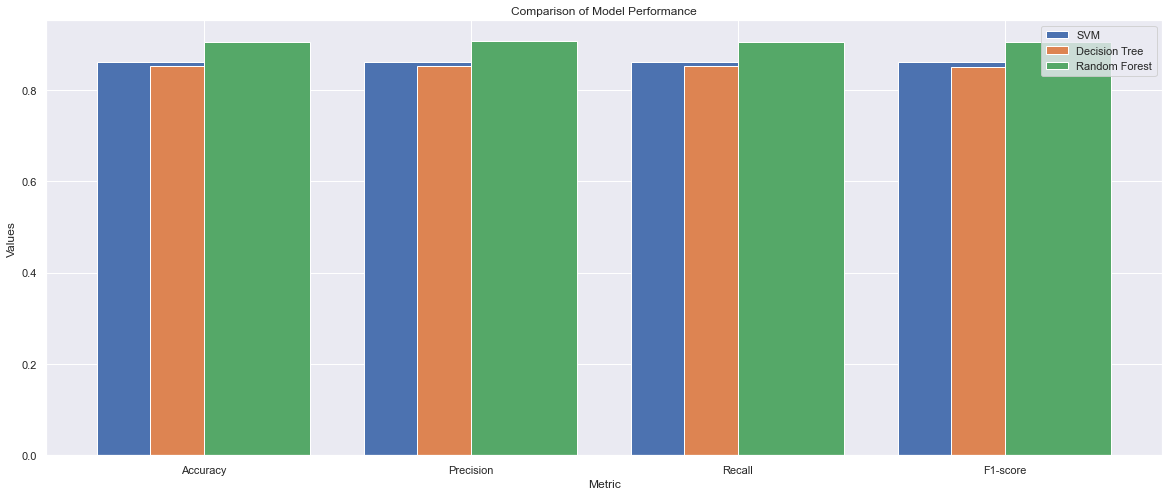

In [717]:
plt.figure(figsize = (20,8))
X = ['Accuracy', 'Precision', 'Recall', 'F1-score']
svm_val = [accuracy_svm, precision_svm , recall_svm, f1score_svm]
dtc_val = [accuracy_dtc, precision_dtc , recall_dtc, f1score_dtc]
rfc_val = [accuracy_rfc, precision_rfc , recall_rfc, f1score_rfc]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis-0.2, svm_val, 0.4, label = 'SVM')
plt.bar(X_axis, dtc_val, 0.4, label = 'Decision Tree')
plt.bar(X_axis+0.2, rfc_val, 0.4, label = 'Random Forest')
  
plt.xticks(X_axis, X)
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Comparison of Model Performance")
plt.legend()

<h4>Visualizing the performance of Random Forest Model</h4>

<h5>Plotting of Confusion Matrix</h5>

- Confusion Matrix: a table that shows number of correct & incorrect predictions made by model compared with actual classifications in test set 
- Also known as an error matrix, is a specific table layout that allows visualization of performance of an algorithm.

Visualuzation of Confusion Matrix for Random Forest : 


<Figure size 720x720 with 0 Axes>

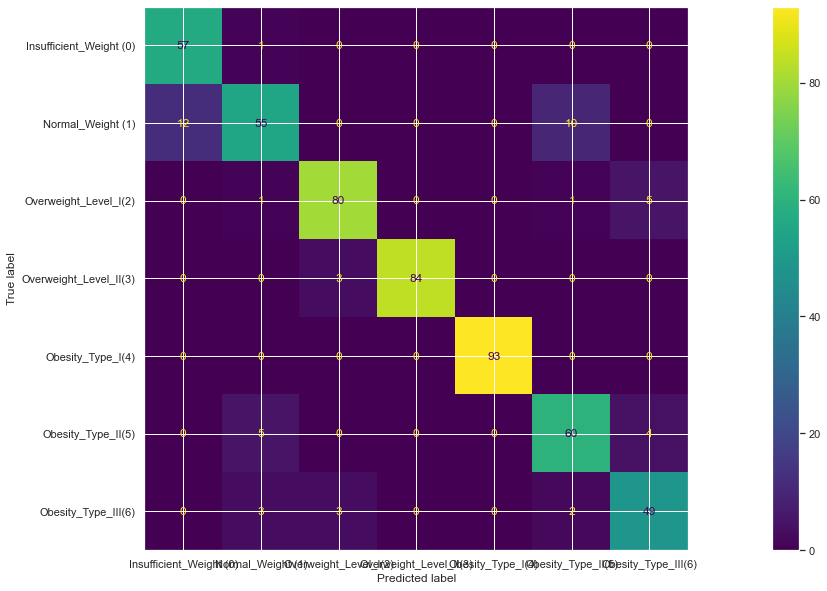

In [716]:
print(f"Visualuzation of Confusion Matrix for Random Forest : ")

fig = plt.figure(figsize=(10, 10))

cf_model = model_eval_list['Confusion Matrix'][2]
cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_model,display_labels=['Insufficient_Weight (0)', 
        'Normal_Weight (1)', 'Overweight_Level_I(2)', 'Overweight_Level_II(3)','Obesity_Type_I(4)',
        'Obesity_Type_II(5)', 'Obesity_Type_III(6)'])
cm_plot.text_ = 'Actual values'
cm_plot.plot()
plt.show()

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

--------------Type the answers below this line--------------

__What is the solution that is proposed to solve the business problem discussed in Section 1.__

As we are trying to predict Categorical Target variable NObesity (Obesity Level) based on Independent Attributes related with eating habits (FAVC, FCVC, NCP, CAEC, CH20 & CALC) & attributes related with the physical condition (SCC, FAF, TUE, MTRANS) & other variables (Gender, Age, Height and Weight), Classification Models are followed for this prediction.

Among different available Classification Models, below 2 Models are implemented:

<h4>SVM (Support Vector Machine)</h4>
 - One of most popular Supervised Learning algorithms for Classification<br>
 - Performant, not biased by outliers, not sensitive to overfitting.
 
<h4>Decision Tree</h4>
 - Powerful classifier.<br> 
 - Interpretability, no need for feature scaling, works on both linear / non – linear problems.
 
<h4>Random Forest</h4>
 - Most powerful classifier.<br> 
 - works on both linear / non – linear problems.
 - it is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees
 
 Comparing the prediction results, it is found that our __Random Forest Classifier__ model performs better than other models for given Test DataSet. 

__So, we would recommend Random Forest Model for estimation of obesity levels based on eating habits and physical condition on provided DataSet.__

<h4>Challenges</h4>

- There are few Continious variables that need to be converted to categorical variables (using Binning) as Classification Models work better for categorical attributes than continious ones.

- From Correlation Matrix, target variable NObeyesdad is not highly correlated with any of independent variables.
Surprisingly NObeyesdad is not at all correlated with MTRANS_Automobile, CALC, Height.

- As Detected Outliers(706) were more than 30% of total population while considering 1.5 times of InterQuartile Range (IQR) ,  
we have considered 3 times of IQR for Uper & Lower Limit calculation of Outliers (total of 353 as 16% of total population).

<h4>Observations</h4>

- It seems like this DataSet is pre-processed to some extent as no missing value present here.

- Although more outlier detection (via IQR tuning) is leading to better performance (more than 90% F1-score) in both models, we kept outlier detection detection at optimal level to avoid model overfitting.



<h4>Decisions made</h4>

- Although values of few attributes were continious numeric values within Dataset,  we have mapped them into respective bins to improve model performance.
- We avoided implementation to few Classification Models such as KNN, Naive Bayes due to their complexity of implementation.
- As Tree based Classification Model is easy to implement & interpret & having high prediction rate, we opted for Tree based Ensemble Model Random Forest.

##NOTE
All Late Submissions will incur a penalty of -2 marks. Do ensure on time submission to avoid penalty.

Good Luck!!!